# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [82]:
#Creating a dataframe so I can store the API data

city_dataframe=pd.DataFrame(cities)
city_dataframe.head()


,0
0,half moon bay
1,los algarrobos
2,saint-philippe
3,zyryanka
4,castro


In [83]:
#Changing the column 0 to City
city_dataframe=cities_dataframe.rename(columns={0: "City"})
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port blair,44,IN,1544676580,100,11.67,92.75,81.17,19.53
1,aklavik,90,CA,1544673600,76,68.22,-135.01,-5.81,7.67
2,yazoo city,1,US,1544675700,87,32.86,-90.41,53.6,5.82
3,xining,0,CN,1544676875,47,36.62,101.77,29.74,2.64
4,vaini,0,IN,1544673600,46,15.34,74.49,75.2,9.17


In [84]:
# set up additional columns to hold information
city_dataframe['Cloudiness'] = ""
city_dataframe['Country'] = ""
city_dataframe['Date'] = ""
city_dataframe['Humidity'] = ""
city_dataframe['Lat'] = ""
city_dataframe['Lng'] = ""
city_dataframe['Max Temp'] = ""
city_dataframe['Wind Speed'] = ""

city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port blair,,,,,,,,
1,aklavik,,,,,,,,
2,yazoo city,,,,,,,,
3,xining,,,,,,,,
4,vaini,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [85]:
url = "http://api.openweathermap.org/data/2.5/weather"
api_key="3674ad71a6f2083cd8258e5e84b2eeaa"
params= {"units": "Imperial",
    "appid": "3674ad71a6f2083cd8258e5e84b2eeaa"}

print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in city_dataframe.iterrows():

    # get city name from dataframe
    city_name = row['City']
    
    # updating url address key value
    params['q'] = city_name

    # assembling url and make API requests
    print(f"Processing Record {index} of {city_name}")
    weather_response = requests.get(url, params=params).json()

    
    try:
        
        city_dataframe.loc[index,'Cloudiness'] = weather_response['clouds']['all']
        city_dataframe.loc[index,'Country'] = weather_response['sys']['country']
        city_dataframe.loc[index,'Date'] = weather_response['dt']
        city_dataframe.loc[index,'Humidity'] = weather_response['main']['humidity']
        city_dataframe.loc[index,'Lat'] = weather_response['coord']['lat']
        city_dataframe.loc[index,'Lng'] = weather_response['coord']['lon']
        city_dataframe.loc[index,'Max Temp'] = weather_response['main']['temp_max']
        city_dataframe.loc[index,'Wind Speed'] = weather_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")





Beginning Data Retrieval
-----------------------------
Processing Record 0 of port blair
Processing Record 1 of aklavik
Processing Record 2 of yazoo city
Processing Record 3 of xining
Processing Record 4 of vaini
Processing Record 5 of asau
City not found. Skipping...
Processing Record 6 of sur
Processing Record 7 of hermanus
Processing Record 8 of husavik
Processing Record 9 of codrington
Processing Record 10 of rikitea
Processing Record 11 of pandan
Processing Record 12 of axim
Processing Record 13 of hobart
Processing Record 14 of manokwari
Processing Record 15 of east london
Processing Record 16 of ushuaia
Processing Record 17 of yerbogachen
Processing Record 18 of mataura
Processing Record 19 of gat
Processing Record 20 of airai
Processing Record 21 of qaanaaq
Processing Record 22 of nikolskoye
Processing Record 23 of arraial do cabo
Processing Record 24 of castro
Processing Record 25 of nilanga
Processing Record 26 of dikson
Processing Record 27 of fortuna
Processing Record 28 of

Processing Record 224 of privolzhskiy
Processing Record 225 of tsihombe
City not found. Skipping...
Processing Record 226 of hofn
Processing Record 227 of biltine
Processing Record 228 of carnarvon
Processing Record 229 of ola
Processing Record 230 of sisimiut
Processing Record 231 of arlit
Processing Record 232 of fort nelson
Processing Record 233 of ust-ilimsk
Processing Record 234 of vila franca do campo
Processing Record 235 of severo-kurilsk
Processing Record 236 of kodiak
Processing Record 237 of monkey bay
Processing Record 238 of alofi
Processing Record 239 of bengkulu
City not found. Skipping...
Processing Record 240 of myanaung
Processing Record 241 of tidore
City not found. Skipping...
Processing Record 242 of quthing
Processing Record 243 of udachnyy
Processing Record 244 of sungaipenuh
Processing Record 245 of mar del plata
Processing Record 246 of charters towers
Processing Record 247 of kalemie
Processing Record 248 of grand gaube
Processing Record 249 of kirkuk
Processi

Processing Record 451 of shimoda
Processing Record 452 of jimma
Processing Record 453 of banyo
Processing Record 454 of alexandria
Processing Record 455 of omsukchan
Processing Record 456 of dali
Processing Record 457 of san jose
Processing Record 458 of shakhtinsk
Processing Record 459 of varginha
Processing Record 460 of qasigiannguit
Processing Record 461 of nagar karnul
Processing Record 462 of baile olanesti
Processing Record 463 of altay
Processing Record 464 of siocon
Processing Record 465 of liwale
Processing Record 466 of setermoen
Processing Record 467 of constitucion
Processing Record 468 of kindu
Processing Record 469 of srednekolymsk
Processing Record 470 of kytmanovo
Processing Record 471 of namibe
Processing Record 472 of wuwei
Processing Record 473 of yoichi
Processing Record 474 of andros town
Processing Record 475 of kavaratti
Processing Record 476 of fare
Processing Record 477 of khrebtovaya
Processing Record 478 of amderma
City not found. Skipping...
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
# Saving it into csv
city_dataframe.to_csv("weatherdatahwassignment.py.csv")

In [87]:
city_dataframe.count()

City          624
Cloudiness    624
Country       624
Date          624
Humidity      624
Lat           624
Lng           624
Max Temp      624
Wind Speed    624
dtype: int64

In [88]:
#Dataframe Display
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port blair,92,IN,1544687905,97,11.67,92.75,84.3,22.28
1,aklavik,90,CA,1544684400,76,68.22,-135.01,-5.81,2.24
2,yazoo city,1,US,1544686500,93,32.86,-90.41,53.6,3.36
3,xining,0,CN,1544688047,52,36.62,101.77,30.3,1.14
4,vaini,40,IN,1544684400,32,15.34,74.49,84.2,3.36


In [89]:
#Check data types
city_dataframe.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

In [90]:
# Conversion of objects to floats for the plots
city_dataframe['Cloudiness'] = pd.to_numeric(city_dataframe['Cloudiness'])
city_dataframe['Humidity'] = pd.to_numeric(city_dataframe['Humidity'])
city_dataframe['Lat'] = pd.to_numeric(city_dataframe['Lat'])
city_dataframe['Max Temp'] = pd.to_numeric(city_dataframe['Max Temp'])
city_dataframe['Wind Speed'] = pd.to_numeric(city_dataframe['Wind Speed'])

In [91]:
# Check data types
city_dataframe.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

In [97]:
#Dataframe Display
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port blair,92.0,IN,1544687905,97.0,11.67,92.75,84.30,22.28
1,aklavik,90.0,CA,1544684400,76.0,68.22,-135.01,-5.81,2.24
2,yazoo city,1.0,US,1544686500,93.0,32.86,-90.41,53.60,3.36
3,xining,0.0,CN,1544688047,52.0,36.62,101.77,30.30,1.14
4,vaini,40.0,IN,1544684400,32.0,15.34,74.49,84.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

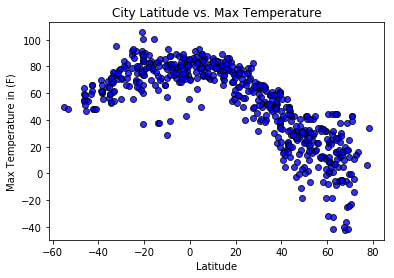

In [99]:
#Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Max Temp"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in (F)")



# Save the figure
plt.savefig("fig1")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

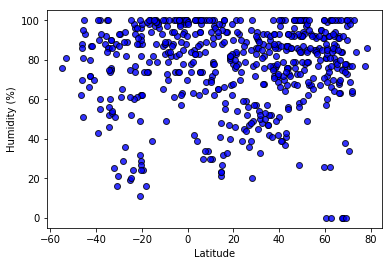

In [100]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Humidity"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("fig2")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

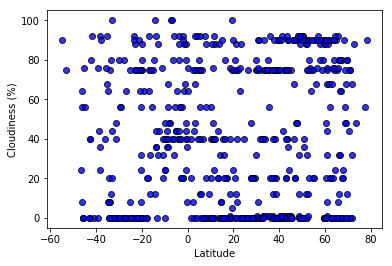

In [101]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Cloudiness"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("fig3")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

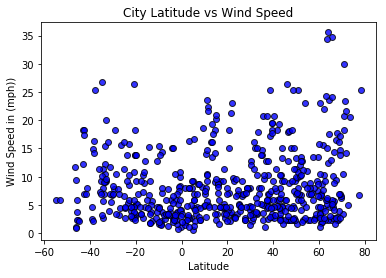

In [102]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Wind Speed"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Wind Speed")
plt.title(title)
plt.ylabel("Wind Speed in (mph))")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("fig4")

# Show plot
plt.show()